## Day 27 Lecture 1 Assignment

In this assignment, we will learn statistical significance in linear models. We will use the google play store dataset loaded below and analyze the regression from this dataset.

In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
reviews = pd.read_csv('https://tf-assets-prod.s3.amazonaws.com/tf-curric/data-science/googleplaystore.csv')

In [3]:
reviews.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


We will predict app ratings using other features describing the app. To use these features, we must clean the data.

To simplify, we will remove the app, category, size, installs, genres, last updated, current ver, and android ver columns. 

In [4]:
# answer below:
#drop columns
reviews = reviews.drop(['App', 'Category', 'Size', 'Installs', 'Genres', 'Last Updated', 'Current Ver', 'Android Ver'], axis=1)

Check for missing values and remove all rows containing missing values

In [6]:
# answer below:
reviews.isnull().mean()

Rating            0.135965
Reviews           0.000000
Type              0.000092
Price             0.000000
Content Rating    0.000092
dtype: float64

In [7]:
reviews = reviews.dropna()

Remove outliers from the Type and Content Rating columns (very rare values that won't train well).

In [8]:
# answer below:
reviews['Content Rating'].value_counts()

Everyone           7420
Teen               1084
Mature 17+          461
Everyone 10+        397
Adults only 18+       3
Unrated               1
Name: Content Rating, dtype: int64

In [9]:
reviews['Type'].value_counts()

Free    8719
Paid     647
Name: Type, dtype: int64

In [11]:
#outliers for Content Rating are unrated adults only 18+
#df = df[df.column != 'Adults only 18+']
reviews = reviews[reviews['Content Rating'] != ('Adults only 18+')]

In [12]:
reviews = reviews[reviews['Content Rating'] != ('Unrated')]

In [13]:
reviews['Content Rating'].value_counts()

Everyone        7420
Teen            1084
Mature 17+       461
Everyone 10+     397
Name: Content Rating, dtype: int64

Convert the Type and Content Rating columns to a numeric format, whether by one-hot encoding, ordinal encoding, or similar.

In [14]:
# answer below:
content_rating = pd.get_dummies(reviews['Content Rating'])
rev_type = pd.get_dummies(reviews['Type'])

In [15]:
reviews = pd.concat([reviews, content_rating], axis=1)
reviews = pd.concat([reviews, rev_type], axis=1)

In [16]:
#drop most recurring 
reviews = reviews.drop(reviews['Content Rating'].value_counts().index[0], axis=1)
reviews = reviews.drop(reviews['Type'].value_counts().index[0], axis=1)

In [17]:
reviews.head()

,Rating,Reviews,Type,Price,Content Rating,Everyone 10+,Mature 17+,Teen,Paid
0,4.1,159,Free,0,Everyone,0,0,0,0
1,3.9,967,Free,0,Everyone,0,0,0,0
2,4.7,87510,Free,0,Everyone,0,0,0,0
3,4.5,215644,Free,0,Teen,0,0,1,0
4,4.3,967,Free,0,Everyone,0,0,0,0


In [18]:
reviews = reviews.drop(['Type', 'Content Rating'], axis=1)

In [19]:
reviews.head()

,Rating,Reviews,Price,Everyone 10+,Mature 17+,Teen,Paid
0,4.1,159,0,0,0,0,0
1,3.9,967,0,0,0,0,0
2,4.7,87510,0,0,0,0,0
3,4.5,215644,0,0,0,1,0
4,4.3,967,0,0,0,0,0


Finally, check that all the columns are of numeric type and change the type of columns that are not numeric. If coercing to numeric causes missing values, remove those rows containing missing values from our dataset.

In [25]:
# answer below:
reviews.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9362 entries, 0 to 10840
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rating        9362 non-null   float64
 1   Reviews       9362 non-null   object 
 2   Price         9362 non-null   object 
 3   Everyone 10+  9362 non-null   uint8  
 4   Mature 17+    9362 non-null   uint8  
 5   Teen          9362 non-null   uint8  
 6   Paid          9362 non-null   uint8  
dtypes: float64(1), object(2), uint8(4)
memory usage: 329.1+ KB


In [27]:
reviews['Reviews'] = pd.to_numeric(reviews['Reviews'],errors='coerce')

In [28]:
reviews['Price'] = pd.to_numeric(reviews['Price'],errors='coerce')

In [29]:
reviews.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9362 entries, 0 to 10840
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rating        9362 non-null   float64
 1   Reviews       9362 non-null   int64  
 2   Price         8715 non-null   float64
 3   Everyone 10+  9362 non-null   uint8  
 4   Mature 17+    9362 non-null   uint8  
 5   Teen          9362 non-null   uint8  
 6   Paid          9362 non-null   uint8  
dtypes: float64(2), int64(1), uint8(4)
memory usage: 329.1 KB


In [30]:
reviews = reviews.dropna()

Perform a train test split with 20% of the data in the test sample.

In [31]:
# answer below:
from sklearn.model_selection import train_test_split

X = reviews.drop(['Rating'], axis=1)
y = reviews['Rating']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

Now generate a linear model using statsmodels and produce a p value for each coefficient in the model. Analyze the results. (Look at the results table and at a homoscedasticity plot.)

In [33]:
# answer below:
import statsmodels.api as sm

X_constant = sm.add_constant(X)

results = sm.OLS(y, X_constant).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                 Rating   R-squared:                       0.007
Model:                            OLS   Adj. R-squared:                  0.007
Method:                 Least Squares   F-statistic:                     15.86
Date:                Tue, 20 Oct 2020   Prob (F-statistic):           6.08e-13
Time:                        15:40:06   Log-Likelihood:                -6506.8
No. Observations:                8715   AIC:                         1.302e+04
Df Residuals:                    8710   BIC:                         1.306e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            4.1773      0.006    673.708   

/usr/local/lib/python3.6/dist-packages/statsmodels/regression/linear_model.py:1755: RuntimeWarning: divide by zero encountered in double_scalars
  return np.sqrt(eigvals[0]/eigvals[-1])
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:1294: RuntimeWarning: invalid value encountered in true_divide
  return self.params / self.bse
/usr/local/lib/python3.6/dist-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/usr/local/lib/python3.6/dist-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
/usr/local/lib/python3.6/dist-packages/scipy/stats/_distn_infrastructure.py:1912: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


In [35]:
from sklearn.linear_model import LinearRegression
linear = LinearRegression()
linear.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [36]:
y_train_pred = linear.predict(X_train)
train_errors = (y_train - y_train_pred)
print('Mean of errors is: {}'.format(np.mean(train_errors)))

Mean of errors is: 6.494454365506653e-16


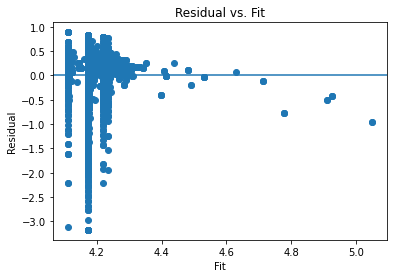

Bartlett test statistic value is 24500.9 and p value is 0
Levene test statistic value is 4908.26 and p value is 0


In [37]:
plt.scatter(y_train_pred, train_errors)
plt.xlabel('Fit')
plt.ylabel('Residual')
plt.axhline(y=0)
plt.title('Residual vs. Fit')
plt.show()

from scipy.stats import bartlett
from scipy.stats import levene

bart_stats = bartlett(y_train_pred, train_errors)
lev_stats = levene(y_train_pred, train_errors)

print("Bartlett test statistic value is {0:3g} and p value is {1:.3g}".format(bart_stats[0], bart_stats[1]))
print("Levene test statistic value is {0:3g} and p value is {1:.3g}".format(lev_stats[0], lev_stats[1]))

Scale your predictors and refit the linear model.

* How does this change the coefficients?
* How does this change the coefficients' p values?
* How does this change model performance?

In [39]:
# answer below
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X_train)


In [48]:
X_scaled_constant = sm.add_constant(X_scaled)

results = sm.OLS(y_train, X_scaled_constant).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                 Rating   R-squared:                       0.007
Model:                            OLS   Adj. R-squared:                  0.007
Method:                 Least Squares   F-statistic:                     13.15
Date:                Tue, 20 Oct 2020   Prob (F-statistic):           1.13e-10
Time:                        16:04:13   Log-Likelihood:                -5198.6
No. Observations:                6972   AIC:                         1.041e+04
Df Residuals:                    6967   BIC:                         1.044e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.1743      0.007    603.789      0.0

/usr/local/lib/python3.6/dist-packages/statsmodels/regression/linear_model.py:1755: RuntimeWarning: divide by zero encountered in double_scalars
  return np.sqrt(eigvals[0]/eigvals[-1])
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:1294: RuntimeWarning: invalid value encountered in true_divide
  return self.params / self.bse
/usr/local/lib/python3.6/dist-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/usr/local/lib/python3.6/dist-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
/usr/local/lib/python3.6/dist-packages/scipy/stats/_distn_infrastructure.py:1912: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


For coefficients most went up in value but the 'Reviews' column had the most change in it's coefficient value. The p-values were not changed enough after the scaling. The 'Everyone 10+' column before had slightly over 0.05 (p-value) and still does. That column also illustrates the lower bound and upper bound crossing 0 as it did before. After scaling the model became better but not enough for satisification 